In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

from scipy import stats

import seaborn as sns

plt.rcParams['font.family']=['Times New Roman']

In [74]:
file_address = '../Data/Merged_data/Ageout_tdap.csv'

df_age_tdap = pd.read_csv(file_address)


file_address = '../Data/Merged_data/Ageout_hpv.csv'

df_age_hpv = pd.read_csv(file_address)


file_address = '../Data/Merged_data/Ageout_total.csv'

df_age_total = pd.read_csv(file_address)


file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [75]:
len(df_age_total)

1019481

In [76]:
len(df_age_hpv)

474000

In [77]:
len(df_tdap_nassau)+len(df_tdap_suffolk)

891343

In [78]:
len(df_hpv_nassau)+len(df_hpv_suffolk)+len(df_tdap_nassau)+len(df_tdap_suffolk)

1756134

In [368]:
# Read Hpv data
file_address = '../Data/Merged_data/NassauCountyHPV.xlsx'

df_hpv_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyHPV.xlsx'

df_hpv_suffolk = pd.read_excel(file_address)

# Read TDAP data
file_address = '../Data/Merged_data/NassauCountyTDAP.xlsx'

df_tdap_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyTDAP.xlsx'

df_tdap_suffolk = pd.read_excel(file_address)

In [633]:
len(df_tdap_suffolk)+len(df_tdap_nassau)+len(df_hpv_suffolk)+len(df_hpv_suffolk)

2173576

In [370]:
df_hpv = pd.concat([df_hpv_suffolk,df_hpv_nassau])

In [109]:
#Read the Cleaned hpv patients Data:
file_address = '../Data/Merged_data/distinct_hpv_patients.csv'

hpv_patients = pd.read_csv(file_address)

# file_address = '../Data/race_hpv.csv'
# hpv_race = pd.read_csv(file_address)

# file_address = '../Data/total_population.csv'
# total_poplt_race = pd.read_csv(file_address)


In [82]:
def calamount(df,years,start,end):
    rate = []
    for year in years:
        lst = list(df[year])
        count = 0
        for i in range(len(lst)):
            if lst[i]:
                if lst[i]<=end and lst[i]>=start:
                    count += 1
#     print(count)
        rate.append(count)
    return np.array(rate)[4:]

# Figure B calculate the rate

In [86]:
#Calculate each populations:
years = np.array((df_age_total.columns))[6:]
hpv_amount = calamount(df_age_hpv,years,9,13)
total_amount = calamount(df_age_total,years,9,13)
tdap_amount = calamount(df_age_tdap,years,9,13)


#Calculate each rate
hpv_Rate = hpv_amount/total_amount
tdap_Rate = tdap_amount/total_amount

# We only keep the rate and amount from 2012 to 2021
# hpv_amount = hpv_amount[4:]
# hpv_Rate = hpv_Rate[4:]
# tdap_amount = tdap_amount[4:]
# tdap_Rate = tdap_Rate[4:]
# total_amount = total_amount[4:]
# years = years[4:]

In [386]:
hpv_amount

array([ 7365, 10470, 13325, 17752, 21299, 23283, 25721, 27763, 27038,
       25254, 25311, 25106])

In [382]:
years = np.array((df_age_total.columns))[6:]
years

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [383]:
#calculate gender based populations:
df_age_hpv_m = df_age_hpv[df_age_hpv['GENDER']=='M']
df_age_hpv_f = df_age_hpv[df_age_hpv['GENDER']=='F']

df_age_total_m = df_age_total[df_age_total['GENDER']=='M']
df_age_total_f = df_age_total[df_age_total['GENDER']=='F']

hpv_amount_m = calamount(df_age_hpv_m,years,9,13)
hpv_amount_f = calamount(df_age_hpv_f,years,9,13)

total_amount_m = calamount(df_age_total_m,years,9,13)
total_amount_f = calamount(df_age_total_f,years,9,13)

hpv_Rate_m = hpv_amount_m/total_amount_m
hpv_Rate_f = hpv_amount_f/total_amount_f

In [384]:
years = years[4:]

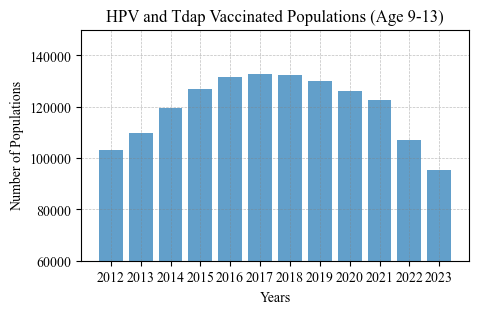

In [90]:
# show total population change:
plt.figure(figsize=(5, 3))

plt.bar(years, total_amount,alpha=0.7)
plt.ylim([60000,150000])
plt.xlabel('Years')
plt.ylabel('Number of Populations')
plt.title('HPV and Tdap Vaccinated Populations (Age 9-13)')
plt.xticks(years)

plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/total_populations.jpg')
plt.show()


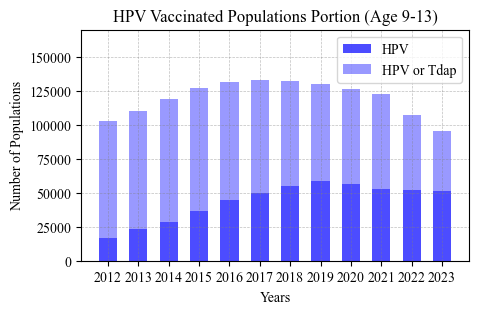

In [100]:
categories = years
values1 = hpv_amount
values2 = total_amount - hpv_amount

x = np.arange(len(categories))

plt.figure(figsize=(5, 3))

plt.bar(x, values1,color = 'blue',alpha = 0.7, label='HPV', width=0.6)

plt.bar(x, values2,color = 'blue',alpha = 0.4, label='HPV or Tdap', width=0.6, bottom=values1)

plt.xlabel('Years')
plt.ylabel('Number of Populations')
plt.ylim([0,170000])
plt.title('HPV Vaccinated Populations Portion (Age 9-13)')
plt.xticks(x, categories)
plt.legend()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_vs_Total_populations.jpg')

plt.show()


In [82]:
0.43125822/0.45418354

0.949524106487875

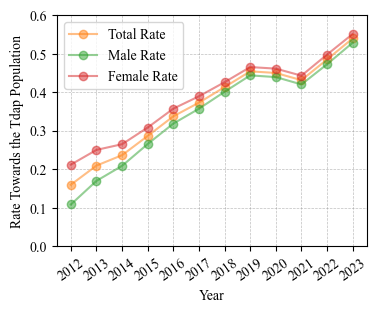

In [385]:
# Show hpv rate change
plt.figure(figsize=(4, 3))

# plt.bar(years, hpv_Rate,color = 'blue',alpha=0.5,width=0.6)
plt.plot(years, hpv_Rate,'o-',color = 'C1',alpha=0.5,label='Total Rate')
plt.plot(years, hpv_Rate_m,'o-',color = 'C2',alpha=0.5,label = 'Male Rate')
plt.plot(years, hpv_Rate_f,'o-',color = 'C3',alpha=0.5,label = 'Female Rate')
# plt.plot(years, hpv_Rate,'*-', color='red', label='rate')
plt.ylim([0,0.6])
plt.xlabel('Year')
plt.ylabel('Rate Towards the Tdap Population')
# plt.title('HPV Vaccination Rate Yearly Change (Age 9-13)')
plt.xticks(years,rotation = 35)
plt.legend(loc='best')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureB/Total_male_female.jpg')


plt.show()

### comparison between different county

In [268]:
df_age_hpv.columns

Index(['client_id', 'RACE_DESC', 'ETHNICITY_DESC', 'PatientZip',
       'PatientCounty', 'GENDER', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')

In [261]:
df_age_hpv['PatientCounty'].unique()

array(['Nassau', 'Suffolk'], dtype=object)

In [584]:
years = np.array((df_age_total.columns))[6:]
# suffolk
df_suffolk_hpv = df_age_hpv[df_age_hpv['PatientCounty']=='Suffolk']
df_suffolk_total = df_age_total[df_age_total['PatientCounty']=='Suffolk']
df_suffolk_tdap = df_age_tdap[df_age_tdap['PatientCounty']=='Suffolk']

hpv_amount = calamount(df_suffolk_hpv,years,9,13)
total_amount = calamount(df_suffolk_total,years,9,13)
tdap_amount = calamount(df_suffolk_tdap,years,9,13)

hpv_Rate_s = hpv_amount/total_amount
tdap_Rate_s = tdap_amount/total_amount



In [585]:
hpv_amount

array([ 9093, 12534, 14890, 18631, 23075, 26274, 29008, 31220, 29697,
       27554, 26537, 26416])

In [586]:
total_amount

array([56336, 59657, 64316, 67468, 69334, 69829, 69227, 67297, 64454,
       62275, 47520, 36815])

In [289]:
#suffolk Male/ Female
df_suffolk_hpv_m = df_suffolk_hpv[df_suffolk_hpv['GENDER']=='M']
df_suffolk_total_m = df_suffolk_total[df_suffolk_total['GENDER']=='M']
df_suffolk_hpv_f = df_suffolk_hpv[df_suffolk_hpv['GENDER']=='F']
df_suffolk_total_f = df_suffolk_total[df_suffolk_total['GENDER']=='F']

hpv_amount_m = calamount(df_suffolk_hpv_m,years,9,13)
total_amount_m = calamount(df_suffolk_total_m,years,9,13)

hpv_amount_f = calamount(df_suffolk_hpv_f,years,9,13)
total_amount_f = calamount(df_suffolk_total_f,years,9,13)

hpv_Rate_sm = hpv_amount_m/total_amount_m
hpv_Rate_sf = hpv_amount_f/total_amount_f


In [293]:
print(hpv_Rate_sf)

[0.21041585 0.24827493 0.26183721 0.29965293 0.35464039 0.39419245
 0.42976397 0.47151045 0.46556882 0.45260749 0.57001922 0.72985808]


In [292]:
print(total_amount)

[56336 59657 64316 67468 69334 69829 69227 67297 64454 62275 47520 36815]


In [294]:
#nassau

df_nassau_hpv = df_age_hpv[df_age_hpv['PatientCounty']=='Nassau']
df_nassau_total = df_age_total[df_age_total['PatientCounty']=='Nassau']
df_nassau_tdap = df_age_tdap[df_age_tdap['PatientCounty']=='Nassau']

hpv_amount = calamount(df_nassau_hpv,years,9,13)
total_amount = calamount(df_nassau_total,years,9,13)
tdap_amount = calamount(df_nassau_tdap,years,9,13)

hpv_Rate_n = hpv_amount/total_amount
tdap_Rate_n = tdap_amount/total_amount

# years = years[4:]

In [295]:
#Nassau Male/ Female
df_nassau_hpv_m = df_nassau_hpv[df_nassau_hpv['GENDER']=='M']
df_nassau_total_m = df_nassau_total[df_nassau_total['GENDER']=='M']
df_nassau_hpv_f = df_nassau_hpv[df_nassau_hpv['GENDER']=='F']
df_nassau_total_f = df_nassau_total[df_nassau_total['GENDER']=='F']

hpv_amount_m = calamount(df_nassau_hpv_m,years,9,13)
total_amount_m = calamount(df_nassau_total_m,years,9,13)

hpv_amount_f = calamount(df_nassau_hpv_f,years,9,13)
total_amount_f = calamount(df_nassau_total_f,years,9,13)

hpv_Rate_nm = hpv_amount_m/total_amount_m
hpv_Rate_nf = hpv_amount_f/total_amount_f


In [296]:
years = years[4:]

In [279]:
print(hpv_amount)

[ 7365 10470 13325 17752 21299 23283 25721 27763 27038 25254 25311 25106]


In [280]:
print(total_amount)

[46732 50241 55019 59554 62200 63076 63219 62569 61639 60176 59381 58638]


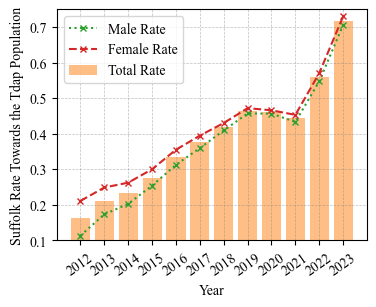

In [322]:
# Show hpv rate change
plt.figure(figsize=(4, 3))

# plt.bar(years, hpv_Rate,color = 'blue',alpha=0.5,width=0.6)
# plt.plot(years, hpv_Rate_s,'o-',color = 'C1',alpha=0.5,label='Suffolk Rate')
plt.bar(years, hpv_Rate_s,color = 'C1',alpha=0.5,label='Total Rate')
plt.plot(years, hpv_Rate_sm,'x:',ms='4',color = 'C2',label='Male Rate')
plt.plot(years, hpv_Rate_sf,'x--',ms='4',color = 'C3',label='Female Rate')
# plt.plot(years, hpv_Rate_sf,'o:',color = 'C1',alpha=0.5,label='Suffolk Female')
# plt.plot(years, hpv_Rate_n,'o-',color = 'C2',alpha=0.5,label = 'Nassau Rate')
# plt.bar(years, hpv_Rate_n,color = 'C2',alpha=0.5,label = 'Nassau Rate')

plt.ylim([0.1,0.75])
plt.xlabel('Year')
plt.ylabel('Suffolk Rate Towards the Tdap Population')
# plt.title('HPV Vaccination Rate Yearly Change (Age 9-13)')
plt.xticks(years,rotation = 35)
plt.legend(loc='best')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureB/Suffolk.jpg')


plt.show()

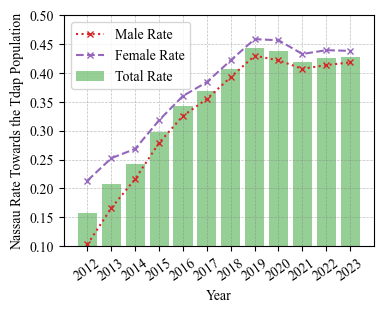

In [330]:
# Show hpv rate change
plt.figure(figsize=(4, 3))

# plt.bar(years, hpv_Rate,color = 'blue',alpha=0.5,width=0.6)
# plt.plot(years, hpv_Rate_s,'o-',color = 'C1',alpha=0.5,label='Suffolk Rate')
plt.bar(years, hpv_Rate_n,color = 'C2',alpha=0.5,label='Total Rate')
plt.plot(years, hpv_Rate_nm,'x:',ms='4',color = 'C3',label='Male Rate')
plt.plot(years, hpv_Rate_nf,'x--',ms='4',color = 'C4',label='Female Rate')
# plt.plot(years, hpv_Rate_sf,'o:',color = 'C1',alpha=0.5,label='Suffolk Female')
# plt.plot(years, hpv_Rate_n,'o-',color = 'C2',alpha=0.5,label = 'Nassau Rate')
# plt.bar(years, hpv_Rate_n,color = 'C2',alpha=0.5,label = 'Nassau Rate')

plt.ylim([0.1,0.5])
plt.xlabel('Year')
plt.ylabel('Nassau Rate Towards the Tdap Population')
# plt.title('HPV Vaccination Rate Yearly Change (Age 9-13)')
plt.xticks(years,rotation = 35)
plt.legend(loc='best')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureB/Nassau.jpg')


plt.show()

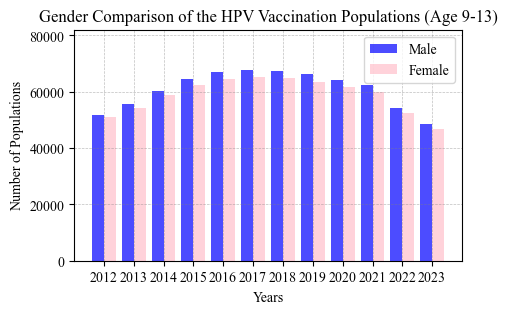

In [204]:
x = years
x_pos = np.arange(len(x))
bar_width = 0.4

plt.figure(figsize=(5, 3))

# Create the barplot
plt.bar(x_pos - bar_width/2, total_amount_m, bar_width,color = 'blue',alpha = 0.7, label='Male')
plt.bar(x_pos + bar_width/2, total_amount_f, bar_width,color = 'pink',alpha = 0.7, label='Female')

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Number of Populations')
plt.ylim([0,82000])
plt.title('Gender Comparison of the HPV Vaccination Populations (Age 9-13)')
plt.xticks(x_pos, x)
plt.legend()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)

plt.show()


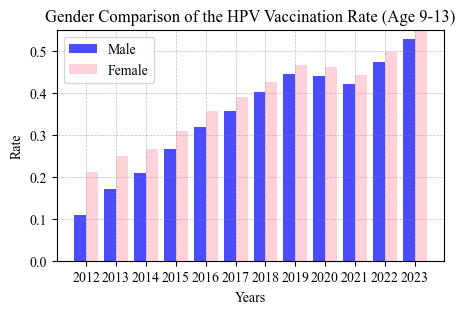

In [205]:
x = years
bar1_values =hpv_Rate_m
bar2_values = hpv_Rate_f

x_pos = np.arange(len(x))

# Bar width
bar_width = 0.4

plt.figure(figsize=(5, 3))

# Create the barplot
plt.bar(x_pos - bar_width/2, bar1_values, bar_width,color = 'blue',alpha = 0.7, label='Male')
plt.bar(x_pos + bar_width/2, bar2_values, bar_width,color = 'pink',alpha = 0.7, label='Female')

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Rate')
plt.ylim([0,0.55])
plt.title('Gender Comparison of the HPV Vaccination Rate (Age 9-13)')
plt.xticks(x_pos, x)
plt.legend()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Gender_Rate.jpg')
plt.show()


In [ ]:
#calculate each year old separate
hpv_amount9 = calamount(df_age_hpv,years,9,9)
hpv_amount10 = calamount(df_age_hpv,years,10,10)
hpv_amount11 = calamount(df_age_hpv,years,11,11)
hpv_amount12 = calamount(df_age_hpv,years,12,12)
hpv_amount13 = calamount(df_age_hpv,years,13,13)

total_amount = calamount(df_age_total,years,9,13)

# for the separate age I belive that every year newly added vax patient can show more informations
# This cell just leave blank may not be used to plot number



In [14]:
def calculateAgeAmountByGen(age,df):
    df = df[df['PatientAge']==age]
    grouped = df.groupby(['vax_year','GENDER']).size().reset_index(name='count')
    m = grouped[grouped['GENDER']=='M']['count']
    f = grouped[grouped['GENDER']=='F']['count']
    return np.array(m)[4:],np.array(f)[4:]

def calculateAgeAmount(age,df):
    df = df[df['PatientAge']==age]
    grouped = df.groupby(['vax_year']).size().reset_index(name='count')
    return np.array(grouped['count'])[4:]

def calculateAgeRangeAmountByGen(start,end,df):
    df = df[df['PatientAge']<=end]
    df = df[df['PatientAge']>=start]
    grouped = df.groupby(['vax_year','GENDER']).size().reset_index(name='count')
    m = grouped[grouped['GENDER']=='M']['count']
    f = grouped[grouped['GENDER']=='F']['count']
    return np.array(m)[4:],np.array(f)[4:]


In [15]:
#Here we calculated every year vax amount. This will shows the portion of each age group.
# Clinical Visit for HPV in each year.
blue_pink_plate = ['#4e8bc4','#96cbfc','#c2e1fc','#ffc2d9','#ff99be']
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])
df_hpv = df_hpv.sort_values(by=['vax_year','vax_month'],ascending=True)
df_hpv_distinct = df_hpv.drop_duplicates(subset = ['client_id','vax_year'],keep='first')


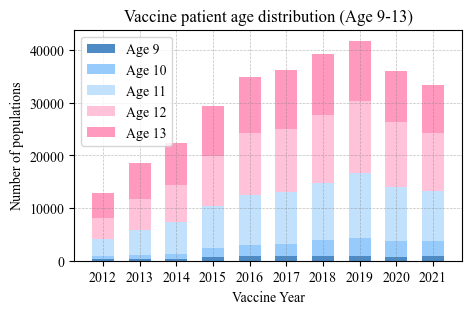

In [164]:
#Scale the age range
m,f,t=[],[],[]
for i in range(9,14):
    t.append(calculateAgeAmount(i,df_hpv_distinct))
    gm,gf = calculateAgeAmountByGen(i,df_hpv_distinct)
    m.append(gm)
    f.append(gf)
    
x = np.arange(len(years))
plt.figure(figsize=(5, 3))

for i in range(9,14):
    plt.bar(x,t[i-9],color = blue_pink_plate[i-9],label = 'Age '+str(i),width = 0.6,bottom=sum(t[:i-9]))

plt.xlabel('Vaccine Year')
plt.ylabel('Number of populations')
plt.title('Vaccine patient age distribution (Age 9-13)')
plt.xticks(x, years)
plt.legend()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

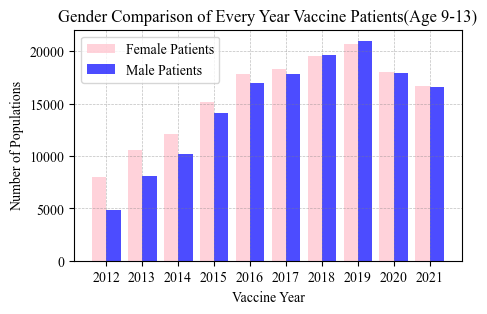

In [16]:
m,f = calculateAgeRangeAmountByGen(9,13,df_hpv_distinct)
x=years
x_pos = np.arange(len(x))
bar_width = 0.4

plt.figure(figsize=(5, 3))

plt.bar(x_pos - bar_width/2, f, bar_width,color = 'pink',alpha = 0.7, label='Female Patients')
plt.bar(x_pos + bar_width/2, m, bar_width,color = 'blue',alpha = 0.7, label='Male Patients')

plt.xlabel('Vaccine Year')
plt.ylabel('Number of Populations')
plt.title('Gender Comparison of Every Year Vaccine Patients(Age 9-13)')
plt.xticks(x_pos, x)
plt.legend()
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.show()

# Figure C Completeness Analysis

In [255]:
df_copy2 = hpv_patients.copy()
rang = []
firstAge = []
doses = []
for i in range(len(df_copy2)):
    if np.isnan(df_copy2['dose12gap'][i]):
        rang.append('Only 1 Dose')
    elif df_copy2['dose12gap'][i]<6:
        rang.append('< 6 months')
    elif df_copy2['dose12gap'][i]<12 and df_copy2['dose12gap'][i]>=6:
        rang.append('6-12 Month(Recommended)')
    else:
        rang.append('Over 1 year')
        
    if df_copy2['PatientAge'][i]<15:
        firstAge.append('First Dose < 15')
    else:
        firstAge.append('First Dose > 15')
    
    if df_copy2['Doses'][i]==1:
        doses.append('1 Dose')
    elif df_copy2['Doses'][i]==2:
        doses.append('2 Doses')
    elif df_copy2['Doses'][i]==3:
        doses.append('3 Doses')
            
df_copy2['gap12'] = rang
df_copy2['firstDoseAge']=firstAge
df_copy2['Doses']=doses
# grouped_patients = df_copy.groupby(['Doses','range']).agg(count=('Doses', 'size'),
#                                             avg=('PatientAge', 'mean')).reset_index()


grouped_patients = df_copy2.groupby(['Doses','gap12','firstDoseAge']).agg(Count=('Doses', 'size'),
                                            Patient_Age=('PatientAge', 'mean')).reset_index()

In [337]:
df = grouped_patients
fig = px.sunburst(df, path=['firstDoseAge','Doses', 'gap12'], values='Count',
                  names='gap12',
                  color='Patient_Age', 
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Patient_Age']))
fig.update_layout(
#     title="Distribution of the HPV Vaccined Patients' Completeness and Schedule",
    title_font=dict(family="Times New Roman"),
    font=dict(family="Times New Roman"),
)
fig.show()

In [50]:
df = grouped_patients
fig = px.sunburst(df, path=['firstDoseAge','gap12', 'Doses'], values='Count',
                  names='gap12',
                  color='Patient_Age', 
                  color_continuous_scale='Agsunset',
                  color_continuous_midpoint=np.average(df['Patient_Age']))
fig.show()

In [345]:
df_hpv = df_hpv.sort_values(by=['client_id','vax_year','vax_month'],ascending=True)

In [342]:
hpv_patients

,client_id,level_0,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
0,9910,243042,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN,NaN
1,12409,321936,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0,2.0
2,21455,75954,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN,NaN
3,21656,0,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0,4.0
4,25161,1,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473990,25255074,445067,1,2023,OTHER,UNKNOWN,10,Gardasil 9,11933.0,Suffolk,Suffolk,F,2,7.0,7.0
473991,25255370,449100,3,2023,UNKNOWN,HISPANIC OR LATINO,10,Gardasil 9,11742.0,Suffolk,Suffolk,F,1,NaN,NaN
473992,25255470,453062,5,2023,WHITE,NOT HISPANIC OR LATINO,10,Gardasil 9,11949.0,Suffolk,Suffolk,M,2,6.0,6.0
473993,25257514,433030,9,2022,OTHER,HISPANIC OR LATINO,13,Gardasil 9,11580.0,Nassau,Nassau,M,2,12.0,12.0


In [371]:
df_hpv[df_hpv['client_id']==341154]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
258,341154,9,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil 9,11720.0,Suffolk,Suffolk,M
449596,341154,8,2022,WHITE,NOT HISPANIC OR LATINO,15,Gardasil 9,11720.0,Suffolk,Suffolk,M


In [372]:
hpv_patients[hpv_patients['client_id']==341154]

,client_id,level_0,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
219,341154,401639,9,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil 9,11720.0,Suffolk,Suffolk,M,2,11.0,11.0


In [373]:
tempdf

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
0,258,341154,9,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil 9,11720.0,Suffolk,Suffolk,M


In [374]:
complete=[]
for i in range(len(hpv_patients)):
    if hpv_patients['Doses'][i]==1:
        # incomplete schedule
        complete.append(0)
        continue
    elif hpv_patients['PatientAge'][i]<15:
        # First Age < 15 two-doses schedule

        tempdf = df_hpv[df_hpv['client_id'] == hpv_patients['client_id'][i]].reset_index()
        if len(tempdf)<2:
            print('ERROR!')
        complete.append(tempdf['vax_year'][1])
    elif hpv_patients['PatientAge'][i] >=15:
        if hpv_patients['Doses'][i]==2:
            complete.append(0)
        elif hpv_patients['Doses'][i] ==3:
            tempdf = df_hpv[df_hpv['client_id'] == hpv_patients['client_id'][i]].reset_index()
            if len(tempdf)<3:
                print('ERROR in 3 dose!!',len(tempdf))
#             print(len(tempdf)
            complete.append(tempdf['vax_year'][2])


In [376]:
len(hpv_patients)==len(complete)

True

In [377]:
hpv_patients['Completeness']=complete

In [571]:
hpv,total,comp=[],[],[]

In [572]:
print(hpv,total,comp)

[] [] []


In [573]:
grouped = hpv_patients.groupby(['Completeness']).size().reset_index(name='count')
print(len(hpv_patients),len(df_age_total),len(hpv_patients)-grouped['count'][0])
hpv.append(len(hpv_patients))
total.append(len(df_age_total))
comp.append(len(hpv_patients)-grouped['count'][0])

473995 1019481 335701


In [574]:
#male
grouped = hpv_patients[hpv_patients['GENDER']=='M'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['GENDER']=='M'])
b = len(df_age_total[df_age_total['GENDER']=='M'])
c = len(hpv_patients[hpv_patients['GENDER']=='M'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

225007 490328 157260


In [575]:
#Female
grouped = hpv_patients[hpv_patients['GENDER']=='F'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['GENDER']=='F'])
b = len(df_age_total[df_age_total['GENDER']=='F'])
c = len(hpv_patients[hpv_patients['GENDER']=='F'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

248334 527857 178118


In [569]:
comp

[403779, 157260, 178118]

In [576]:
base1 = np.array(comp)/np.array(total)
base2 = np.array(hpv)/np.array(total)-base1
portion = 100*(np.array(comp)/np.array(hpv))

In [566]:
portion

array([85.18634163, 69.89115894, 71.72517658])

In [567]:
base1

array([0.39606329, 0.32072409, 0.33743609])

In [565]:
base1+base2

array([0.46493755, 0.45889078, 0.47045696])

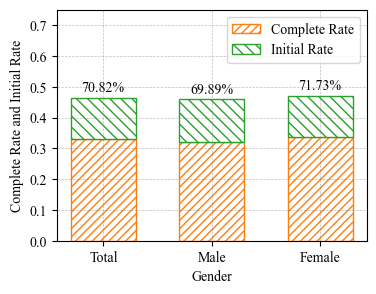

In [577]:
x = np.arange(len(label))
plt.figure(figsize=(4, 3))

#base1 is the complete rate
plt.bar(x,base1,color='w',edgecolor = 'C1',hatch='////',label = 'Complete Rate',width = 0.6,bottom=0)
plt.bar(x,base2,color='w',edgecolor = 'C2',hatch='\\\\\\',label = 'Initial Rate',width = 0.6,bottom=base1)

for i in range(len(label)):
    plt.text(i, base1[i]+base2[i]+0.02,str(round(portion[i],2))+str('%') , ha='center')
    

plt.xlabel('Gender')
plt.ylabel('Complete Rate and Initial Rate')
# plt.title('Vaccine patient age distribution (Age 9-13)')
plt.ylim([0,0.75])
plt.xticks(x, label)
plt.legend(loc='best')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureC/gender.jpg')
plt.show()

### Calculate the Race Disparity

In [511]:
races = ['White','Black','Asian','Hispanic','Not Hispanic']
# base2 = [0.62752636,0.49739642,0.54966887,0.78071993,0.46604202]
# base1 = [0.6896389641202408,]

In [495]:
hpv_patients['RACE_DESC'].unique()

array(['WHITE', 'OTHER', 'ASIAN', 'BLACK OR AFRICAN-AMERICAN', 'UNKNOWN',
       'NATIVE HAWAIIAN OR OTHER PACIFIC',
       'AMERICAN INDIAN OR ALASKA NATIVE', 'NATIVE HAWAIIAN OR OTHER',
       'AMERICAN INDIAN OR ALASKA'], dtype=object)

In [501]:
hpv_patients.columns

Index(['client_id', 'level_0', 'vax_month', 'vax_year', 'RACE_DESC',
       'ETHNICITY_DESC', 'PatientAge', 'Trade_name', 'PatientZip',
       'PatientCounty', 'ProviderCounty', 'GENDER', 'Doses', 'dose12gap',
       'wholeSeriesGap', 'Completeness'],
      dtype='object')

In [494]:
hpv,total,comp=[],[],[]

In [503]:
print(hpv,total,comp)

[233244, 44677, 34801] [547169, 88311, 69659] [170639, 30811, 26060]


In [496]:
#White
grouped = hpv_patients[hpv_patients['RACE_DESC']=='WHITE'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['RACE_DESC']=='WHITE'])
b = len(df_age_total[df_age_total['RACE_DESC']=='WHITE'])
c = len(hpv_patients[hpv_patients['RACE_DESC']=='WHITE'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

233244 547169 170639


In [498]:
#Black
grouped = hpv_patients[hpv_patients['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN'])
b = len(df_age_total[df_age_total['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN'])
c = len(hpv_patients[hpv_patients['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

44677 88311 30811


In [499]:
#Asian
grouped = hpv_patients[hpv_patients['RACE_DESC']=='ASIAN'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['RACE_DESC']=='ASIAN'])
b = len(df_age_total[df_age_total['RACE_DESC']=='ASIAN'])
c = len(hpv_patients[hpv_patients['RACE_DESC']=='ASIAN'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

34801 69659 26060


In [502]:
hpv_patients['ETHNICITY_DESC'].unique()

array(['NOT HISPANIC OR LATINO', 'UNKNOWN', 'HISPANIC OR LATINO'],
      dtype=object)

In [504]:
#His
grouped = hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO'])
b = len(df_age_total[df_age_total['ETHNICITY_DESC']=='HISPANIC OR LATINO'])
c = len(hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

122192 208102 89615


In [505]:
#Asian
grouped = hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO'].groupby(['Completeness']).size().reset_index(name='count')
a = len(hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO'])
b = len(df_age_total[df_age_total['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO'])
c = len(hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO'])-grouped['count'][0]

print(a,b,c)

hpv.append(a)
total.append(b)
comp.append(c)

269436 639493 195585


In [508]:
base1 = np.array(comp)/np.array(total)
base2 = np.array(hpv)/np.array(total)-base1


In [534]:
portion = 100*(np.array(comp)/np.array(hpv))
round(portion[2],2)

74.88

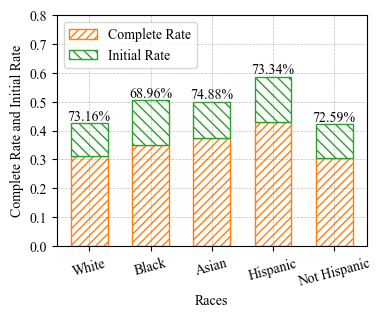

In [536]:
x = np.arange(len(races))
plt.figure(figsize=(4, 3))

#base1 is the complete rate
plt.bar(x,base1,color='w',edgecolor = 'C1',hatch='////',label = 'Complete Rate',width = 0.6,bottom=0)
plt.bar(x,base2,color='w',edgecolor = 'C2',hatch='\\\\\\',label = 'Initial Rate',width = 0.6,bottom=base1)

for i in range(len(races)):
    plt.text(i, base1[i]+base2[i]+0.01,str(round(portion[i],2))+str('%') , ha='center')
    
plt.xlabel('Races')
plt.ylabel('Complete Rate and Initial Rate')
# plt.title('Vaccine patient age distribution (Age 9-13)')
plt.ylim([0,0.8])
plt.xticks(x, races,rotation =15)
plt.legend(loc='upper left')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureC/Race.jpg')
plt.show()

In [54]:
def mergeRacetoOthers(dose):
    dose[4] = dose[4]+dose[0]+dose[3]
    res = list(dose[1:3])
    res=res+list(dose[4:])
    return res

In [204]:
group_race = hpv_patients[hpv_patients['PatientAge']<15].groupby(['RACE_DESC','Doses']).size().reset_index(name='count')
dose1 = np.array(group_race[group_race['Doses']==1]['count'])
dose2 = np.array(group_race[group_race['Doses']==2]['count'])
dose3 = np.array(group_race[group_race['Doses']==3]['count'])
races = np.array(group_race['RACE_DESC'].unique())
res = list(races[1:3])+list(races[4:])
races = res

dose1 = mergeRacetoOthers(dose1)
dose2 = mergeRacetoOthers(dose2)
dose3 = mergeRacetoOthers(dose3)

In [205]:
print(dose1)
print(dose2)
print(dose3)

[3418, 5463, 10595, 7926, 21910]
[12607, 17141, 35199, 18129, 80863]
[4997, 4883, 11911, 7149, 30361]


In [208]:
x

['ASIAN', 'BLACK OR AFRICAN-AMERICAN', 'OTHER', 'UNKNOWN', 'WHITE']

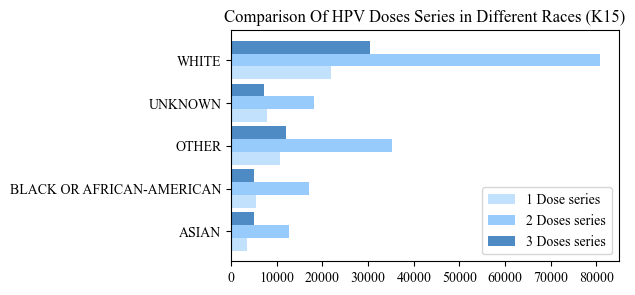

In [207]:
# Position of x-axis values
x_pos = np.arange(len(races))
x = races

bar_width = 0.3
plt.figure(figsize=(5, 3))
plt.barh(x_pos - bar_width, dose1, bar_width, label='1 Dose series',color = '#c2e1fc')
plt.barh(x_pos , dose2, bar_width, label='2 Doses series',color = '#96cbfc')
plt.barh(x_pos + bar_width, dose3, bar_width, label='3 Doses series',color = '#4e8bc4')

plt.title('Comparison Of HPV Doses Series in Different Races (K15)')
plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_Series_Race.jpg')
plt.yticks(x_pos,x)
plt.legend()

plt.show()

In [224]:
races = np.array(hpv_race['race'])

def calamountfull(df,years,start,end):
    rate = []
    for year in years:
        lst = list(df[year])
        count = 0
        for i in range(len(lst)):
            if lst[i]:
                if lst[i]<=end and lst[i]>=start:
                    count += 1
#     print(count)
        rate.append(count)
    return np.array(rate)

def RaceCalAmount(df,years,races,start,end):
    race_val = {}
    for race in races:
        tmp_df = df[df['RACE_DESC']==race]
        amount = calamountfull(tmp_df,years,start,end)
        race_val[race] = np.array(amount)
    return race_val

hpv_amount = RaceCalAmount(df_age_hpv,years,races,9,13)
total_amount = RaceCalAmount(df_age_total,years,races,9,13)

hpv_amount['OTHER'] = hpv_amount['OTHER']+hpv_amount['AMERICAN INDIAN OR ALASKA NATIVE']+hpv_amount['NATIVE HAWAIIAN OR OTHER PACIFIC']
total_amount['OTHER'] = total_amount['OTHER']+total_amount['AMERICAN INDIAN OR ALASKA NATIVE']+hpv_amount['NATIVE HAWAIIAN OR OTHER PACIFIC']

rate = {}
for race in races[:5]:
    rate[race]=hpv_amount[race]/total_amount[race]
rate

{'BLACK OR AFRICAN-AMERICAN': array([0.20758043, 0.26224521, 0.30025208, 0.37348018, 0.43763358,
        0.45901639, 0.49676885, 0.54142036, 0.53464314, 0.52086677,
        0.58311346, 0.62752636]),
 'WHITE': array([0.12442088, 0.17260953, 0.19329124, 0.23537515, 0.28587945,
        0.32364876, 0.36657542, 0.40983328, 0.40863507, 0.38484342,
        0.43722428, 0.49739642]),
 'UNKNOWN': array([0.17437406, 0.21813441, 0.24622932, 0.28972163, 0.33069452,
        0.36000248, 0.38397319, 0.40843306, 0.38655742, 0.36008188,
        0.40006273, 0.45716008]),
 'OTHER': array([0.23304016, 0.2867952 , 0.33075104, 0.38687125, 0.42924469,
        0.46340115, 0.50289017, 0.54140744, 0.53623896, 0.52271089,
        0.57674459, 0.62700562]),
 'ASIAN': array([0.19780776, 0.25330168, 0.27211848, 0.33584185, 0.38809399,
        0.41405384, 0.44943931, 0.48854353, 0.49153908, 0.48774638,
        0.52060247, 0.54966887])}

In [ ]:
#Herion and Non-Herion data

In [238]:
def ethicCalAmount(df,years,ethics,start,end):
    ethics_val = {}
    for ethic in ethics:
        tmp_df = df[df['ETHNICITY_DESC']==ethic]
        amount = calamountfull(tmp_df,years,start,end)
        ethics_val[ethic] = np.array(amount)
    return ethics_val


In [239]:
ethics = np.array(hpv_patients['ETHNICITY_DESC'].unique())
hpv_amount = ethicCalAmount(df_age_hpv,years,ethics,9,13)
total_amount = ethicCalAmount(df_age_total,years,ethics,9,13)

In [242]:
rate = {}
for ethic in ethics[:5]:
    rate[ethic]=hpv_amount[ethic]/total_amount[ethic]
rate

{'NOT HISPANIC OR LATINO': array([0.12543454, 0.17311348, 0.18951442, 0.23223954, 0.2791621 ,
        0.31234061, 0.35365208, 0.39420663, 0.39396741, 0.37027971,
        0.41734493, 0.46604202]),
 'UNKNOWN': array([0.16250454, 0.20250692, 0.22503366, 0.25928412, 0.28684898,
        0.31243061, 0.3321569 , 0.36168559, 0.33932859, 0.31386631,
        0.34422341, 0.39201833]),
 'HISPANIC OR LATINO': array([0.28500992, 0.34118913, 0.39881153, 0.47297348, 0.53904979,
        0.581859  , 0.62548714, 0.6661467 , 0.66453945, 0.65648705,
        0.72653972, 0.78071993])}

In [243]:
# Wrap up the data:

Race_rate = {}
Race_rate['BLACK']=[0.20758043, 0.26224521, 0.30025208, 0.37348018, 0.43763358,
        0.45901639, 0.49676885, 0.54142036, 0.53464314, 0.52086677,
        0.58311346, 0.62752636]
Race_rate['WHITE']=[0.12442088, 0.17260953, 0.19329124, 0.23537515, 0.28587945,
        0.32364876, 0.36657542, 0.40983328, 0.40863507, 0.38484342,
        0.43722428, 0.49739642]
Race_rate['ASIAN']=[0.19780776, 0.25330168, 0.27211848, 0.33584185, 0.38809399,
        0.41405384, 0.44943931, 0.48854353, 0.49153908, 0.48774638,
        0.52060247, 0.54966887]
Race_rate['HISPANIC'] = [0.28500992, 0.34118913, 0.39881153, 0.47297348, 0.53904979,
        0.581859  , 0.62548714, 0.6661467 , 0.66453945, 0.65648705,
        0.72653972, 0.78071993]
Race_rate['NON-HISPANIC']=[0.12543454, 0.17311348, 0.18951442, 0.23223954, 0.2791621 ,
        0.31234061, 0.35365208, 0.39420663, 0.39396741, 0.37027971,
        0.41734493, 0.46604202]

##### verify this answer with our previous study to solid it's correctness.
The number of populations received first hpv dose after Age 15: 138226  
The number of populations received first hpv dose before Age 15: 272552  
The number of populations didn't receive hpv dose: 477499

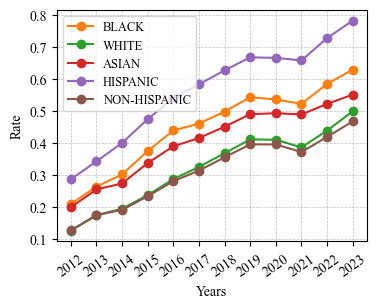

In [254]:
plt.figure(figsize=(4, 3))
# blue_pink_plate = ['#4e8bc4','#96cbfc','#c2e1fc','#ffc2d9','#ff99be']
colors = ['C1','C2','C3','C4','C5']
i=0
for k,v in Race_rate.items():
    plt.plot(years,v,'o-',color=colors[i],label = k )
    i+=1
    
plt.xlabel('Years')
plt.ylabel('Rate')
# plt.title('HPV Vaccination Rate Changed by Races (Age 9-13)')

plt.xticks(years,rotation = 35)
plt.legend(loc='best',prop={'size':9})
# 
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_rate_race.jpg')

plt.show()

In [242]:
#Verify answer
grouped=grouped_patients.groupby('firstDoseAge').sum('Count').reset_index()
grouped

,firstDoseAge,Count,Patient_Age
0,First Dose < 15,272552,73.603499
1,First Dose > 15,138226,114.860350


In [248]:
noVax = {
    'Doses':['0 Dose'],
    'gap12':['No hpv vax'],
    'firstDoseAge':['No hpv record'],
    'Count':[477499],
    'Patient_Age': [16]
}
noVax1 = pd.DataFrame(noVax)
# Attention here, since the no vax group we cannot know the patient age when they receive hpv. Here we use
# the tdap age to represent the color in each block.

In [258]:
df = grouped_patients
fig = px.sunburst(df, path=['firstDoseAge','gap12', 'Doses'], values='Count',
                  names='gap12',
                  color='Patient_Age', 
                  color_continuous_scale='Agsunset',
                  color_continuous_midpoint=np.average(df['Patient_Age']))
fig.show()

### Statistics Figures:

In [326]:
# This function is used to retrive dose12 gaps of each age patients. The output would be a List[List]
# input should be hpv_patients style dataframe

def calculateAgeGap(df):
    res = []
    ages = list(df['PatientAge'].unique())
    for i in range(min(ages),max(ages)+1):
        tmpdf = df[df['PatientAge']==i]
        res.append(np.array(tmpdf['dose12gap']))
    return res

In [352]:
# Clean the outliers in the violin plot and other plot reveals the distribution
# Works for a 2 dimension array.
# input should be List[List]
# output should be List[List]

def cleanforbox(inp):
    res = []
    for lst in inp:
        data = np.array(lst)
        z_scores = np.abs(stats.zscore(data))
        threshold = 2 
        outlier_indices = np.where(z_scores > threshold)
        cleaned_data = data[(z_scores <= threshold)]
        res.append(cleaned_data)
    return res

Text(0, 0.5, 'Months')

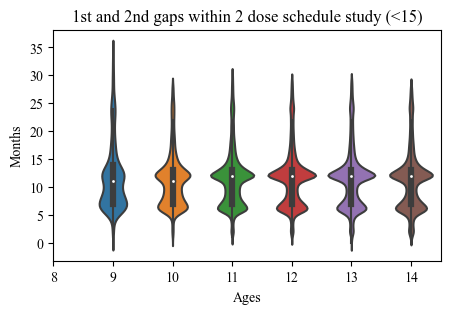

In [357]:
hpv_patients_u15 = hpv_patients[hpv_patients['PatientAge']<15]
hpv_patients_u15_2dose = hpv_patients_u15[hpv_patients_u15['Doses']==2]
gaps_age = calculateAgeGap(hpv_patients_u15_2dose)

box_clean=cleanforbox(gaps_age)

plt.figure(figsize=(5, 3))
sns.violinplot(data=box_clean[1:])

xtick = np.sort(np.array(hpv_patients_u15_2dose['PatientAge'].unique()))
# ytick = np.arange()
plt.title('1st and 2nd gaps within 2 dose schedule study (<15)')
plt.xticks(xtick-9,xtick)
plt.yticks(ticks=range(0,40,5))
plt.xlabel('Ages')
plt.ylabel('Months')


## Figure A： Age Distribution

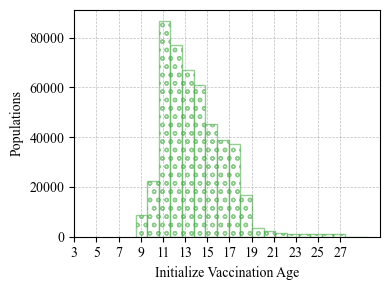

In [620]:
# demographic: age

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data,bins=20,alpha = 0.5,align = 'right',label='Male',edgecolor='C2',color='w',hatch='oo')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
# plt.title('All patients initialized the HPV vaccination')
# plt.grid(which='major',linestyle='-', color='gray', linewidth=1, alpha=0.5)
# ax.minorticks_on()
# plt.grid(which='minor',linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Overall.jpg')
# Show plot
plt.show()

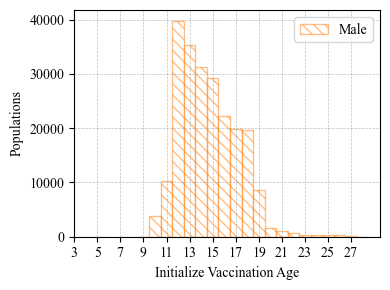

In [621]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['GENDER']=='M']
hpv_patients_female = hpv_patients[hpv_patients['GENDER']=='F']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align = 'right',label='Male',edgecolor='C1',color='w',hatch='\\\\\\')
# plt.hist(data1, bins=10,alpha = 0.5,label='Female',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
plt.tight_layout()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Male.jpg')

# Show plot
plt.show()

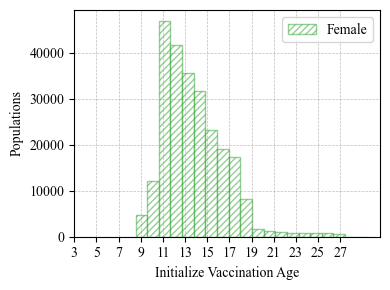

In [623]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['GENDER']=='M']
hpv_patients_female = hpv_patients[hpv_patients['GENDER']=='F']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
# plt.hist(data, bins=10,alpha = 0.5,label='Male',edgecolor='C1',color='w',hatch='\\\\\\')
plt.hist(data1, bins=20,alpha = 0.5,align = 'right',label='Female',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_gender_dist_f.jpg')
# Show plot
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Female.jpg')
plt.show()

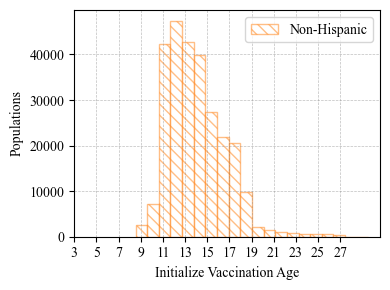

In [624]:
# demographic: Race and ethntics

hpv_patients_male = hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO']
hpv_patients_female = hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align='right',label='Non-Hispanic',edgecolor='C1',color='w',hatch='\\\\\\')
# plt.hist(data1, bins=10,alpha = 0.5,label='Hispanic',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Non-His.jpg')
plt.show()

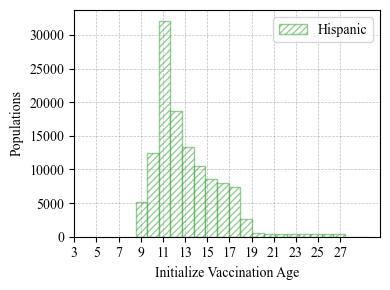

In [625]:


# demographic: Race and ethntics

hpv_patients_male = hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO']
hpv_patients_female = hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
# plt.hist(data, bins=10,alpha = 0.5,label='Non-Hispanic',edgecolor='C1',color='w',hatch='\\\\\\')
plt.hist(data1, bins=20,alpha = 0.5,align='right',label='Hispanic',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Hispanic.jpg')
plt.show()

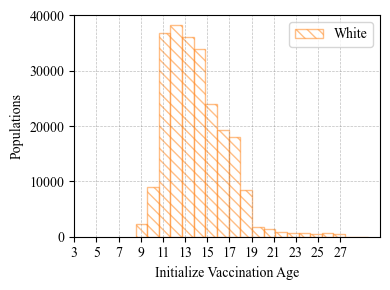

In [627]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['RACE_DESC']=='WHITE']
hpv_patients_female = hpv_patients[hpv_patients['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align='right',label='White',edgecolor='C1',color='w',hatch='\\\\\\')
# plt.hist(data1, bins=10,alpha = 0.5,label='Black',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/White.jpg')
plt.show()

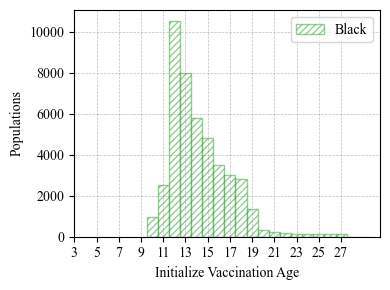

In [628]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['RACE_DESC']=='WHITE']
hpv_patients_female = hpv_patients[hpv_patients['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
# plt.hist(data, bins=10,alpha = 0.5,label='White',edgecolor='C1',color='w',hatch='\\\\\\')
plt.hist(data1, bins=20,alpha = 0.5,align='right',label='Black',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Black.jpg')
plt.show()

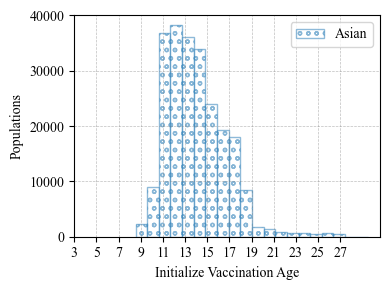

In [629]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['RACE_DESC']=='WHITE']
hpv_patients_female = hpv_patients[hpv_patients['RACE_DESC']=='ASIAN']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align='right',label='Asian',edgecolor='C0',color='w',hatch='oo')
# plt.hist(data1, bins=10,alpha = 0.5,label='Black',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Initialize Vaccination Age')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Asian.jpg')
plt.show()

## Table A Data Calculation

 p values are based on logistic regression. For overall, F tests were used for testing overall differences among 7 years. For linear trend, contrast F tests were used to test whether the change over 7 years followed a linear trend.  

In [110]:
group = hpv_patients.groupby(['vax_year']).size().reset_index(name='count')

In [111]:
group

,vax_year,count
0,2008,16856
1,2009,8650
2,2010,10849
3,2011,15346
4,2012,24253
5,2013,33586
6,2014,34268
7,2015,39943
8,2016,43553
9,2017,40964


In [113]:
sum(group['count'])==len(hpv_patients)

True

In [122]:
def calyearnumber(lst):
    s = 0
    res = []
    for i in range(len(lst)):
        s+= lst[i]
        res.append(s)
    return res


In [123]:
print('the total number of patients in each year is :',calyearnumber(list(group['count'])))

the total number of patients in each year is : [16856, 25506, 36355, 51701, 75954, 109540, 143808, 183751, 227304, 268268, 310072, 351339, 381998, 410773, 443121, 473995]


In [125]:
group = hpv_patients.groupby(['GENDER','vax_year']).size().reset_index(name='count')

,GENDER,vax_year,count
0,F,2008,16684
1,F,2009,8534
2,F,2010,8351
3,F,2011,10164
4,F,2012,11488
5,F,2013,15602
6,F,2014,15979
7,F,2015,19233
8,F,2016,20923
9,F,2017,19915


In [128]:
print('the total number of female patients in each year is :',calyearnumber(list(group['count'])[0:16]))

the total number of female patients in each year is : [16684, 25218, 33569, 43733, 55221, 70823, 86802, 106035, 126958, 146873, 166948, 187044, 202339, 216664, 232859, 248334]


In [130]:
print('the total number of male patients in each year is :',calyearnumber(list(group['count'])[16:32]))

the total number of male patients in each year is : [122, 223, 2693, 7849, 20574, 38493, 56711, 77367, 99946, 120951, 142650, 163788, 179135, 193555, 209654, 225007]


In [137]:
group = hpv_patients.groupby(['ETHNICITY_DESC','vax_year']).size().reset_index(name='count')

In [133]:
group

,ETHNICITY_DESC,vax_year,count
0,HISPANIC OR LATINO,2008,2468
1,HISPANIC OR LATINO,2009,1609
2,HISPANIC OR LATINO,2010,2336
3,HISPANIC OR LATINO,2011,3411
4,HISPANIC OR LATINO,2012,4505
5,HISPANIC OR LATINO,2013,6714
6,HISPANIC OR LATINO,2014,8588
7,HISPANIC OR LATINO,2015,10215
8,HISPANIC OR LATINO,2016,11748
9,HISPANIC OR LATINO,2017,10261


In [134]:
print('the total number of Hispanic patients in each year is :',calyearnumber(list(group['count'])[0:16]))

the total number of Hispanic patients in each year is : [2468, 4077, 6413, 9824, 14329, 21043, 29631, 39846, 51594, 61855, 72568, 84262, 92393, 101611, 112155, 122192]


In [136]:
print('the total number of NON-Hispanic patients in each year is :',calyearnumber(list(group['count'])[16:32]))

the total number of NON-Hispanic patients in each year is : [7891, 11953, 16987, 24710, 38598, 58515, 78026, 101732, 127471, 152483, 177657, 201188, 219371, 234853, 252642, 269436]


In [138]:
group = hpv_patients.groupby(['RACE_DESC','vax_year']).size().reset_index(name='count')
group

,RACE_DESC,vax_year,count
0,AMERICAN INDIAN OR ALASKA,2022,441
1,AMERICAN INDIAN OR ALASKA,2023,436
2,AMERICAN INDIAN OR ALASKA NATIVE,2008,75
3,AMERICAN INDIAN OR ALASKA NATIVE,2009,57
4,AMERICAN INDIAN OR ALASKA NATIVE,2010,97
...,...,...,...
107,WHITE,2019,21075
108,WHITE,2020,15981
109,WHITE,2021,13663
110,WHITE,2022,15242


In [140]:
print('the total number of WHite patients in each year is :',
      calyearnumber(list(group[group['RACE_DESC']=='WHITE']['count'])))

the total number of WHite patients in each year is : [6829, 10171, 14403, 20927, 32635, 49774, 66838, 86873, 109218, 130939, 152995, 174070, 190051, 203714, 218956, 233244]


In [142]:
print('the total number of Asian patients in each year is :',
      calyearnumber(list(group[group['RACE_DESC']=='ASIAN']['count'])))

the total number of Asian patients in each year is : [727, 1187, 1763, 2589, 3990, 5803, 7830, 10642, 13637, 16675, 20017, 23285, 25957, 28451, 31613, 34801]


In [145]:
print('the total number of Black patients in each year is :',
      calyearnumber(list(group[group['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN']['count'])))

the total number of Black patients in each year is : [1203, 2023, 3021, 4449, 6643, 9529, 12635, 16727, 21117, 25031, 28954, 32860, 35569, 38436, 41532, 44677]


In [143]:
group['RACE_DESC'].unique()

array(['AMERICAN INDIAN OR ALASKA', 'AMERICAN INDIAN OR ALASKA NATIVE',
       'ASIAN', 'BLACK OR AFRICAN-AMERICAN', 'NATIVE HAWAIIAN OR OTHER',
       'NATIVE HAWAIIAN OR OTHER PACIFIC', 'OTHER', 'UNKNOWN', 'WHITE'],
      dtype=object)

### Age populations


In [173]:
df_age_hpv

,client_id,RACE_DESC,ETHNICITY_DESC,PatientZip,PatientCounty,GENDER,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,21656,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11520.0,Nassau,F,15.0,16.0,17.0,18.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30
1,25161,WHITE,NOT HISPANIC OR LATINO,11561.0,Nassau,F,15.0,16.0,17.0,18.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30
2,85387,WHITE,NOT HISPANIC OR LATINO,11758.0,Nassau,F,16.0,17.0,18.0,19.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31
3,240100,WHITE,NOT HISPANIC OR LATINO,11530.0,Nassau,F,15.0,16.0,17.0,18.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30
4,289434,WHITE,UNKNOWN,11803.0,Nassau,F,13.0,14.0,15.0,16.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473995,25213555,WHITE,HISPANIC OR LATINO,11776.0,Suffolk,M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
473996,25225292,WHITE,HISPANIC OR LATINO,11717.0,Suffolk,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
473997,25231473,WHITE,HISPANIC OR LATINO,11779.0,Suffolk,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
473998,25235058,WHITE,HISPANIC OR LATINO,11967.0,Suffolk,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [175]:
def calAgeYear(year,df):
    res = [0,0,0,0]
    a= df[year]
    for i in range(len(a)):
        ng = a[i]
        if ng:
            if ng<9:
                res[0]+=1
            elif ng<14:
                res[1]+=1
            elif ng <26:
                res[2]+=1
            else:
                res[3]+=1
    return res

In [187]:
calAgeYear('2023',df_age_hpv)

[1, 51522, 348376, 74101]

In [150]:
group = hpv_patients.groupby(['PatientAge','vax_year']).size().reset_index(name='count')
group

,PatientAge,vax_year,count
0,8,2010,1
1,8,2012,3
2,8,2013,1
3,8,2016,1
4,8,2017,1
...,...,...,...
306,28,2023,2
307,29,2019,2
308,29,2021,1
309,29,2022,1


In [156]:
group.iloc[:10]

,PatientAge,vax_year,count
0,8,2010,1
1,8,2012,3
2,8,2013,1
3,8,2016,1
4,8,2017,1
5,8,2019,2
6,8,2022,2
7,8,2023,1
8,9,2008,181
9,9,2009,124


In [153]:
print('the total number of <9 patients in each year is :',
      calyearnumber(list(group[group['PatientAge']==8]['count'])))

the total number of <9 patients in each year is : [1, 4, 5, 6, 7, 9, 11, 12]


In [189]:
con0 = group['PatientAge']>= 9
con1 = group['PatientAge']<=13
con3 = group['PatientAge']>26
newgroup = group[con3]

In [191]:
grouped = newgroup.groupby(['vax_year']).sum()
grouped

,PatientAge,count
vax_year,,
2008,55,2
2009,27,1
2011,28,2
2017,28,1
2019,56,3
2020,27,1
2021,57,3
2022,56,3
2023,84,6


In [169]:
grouped = newgroup.groupby(['vax_year']).sum()
grouped

In [164]:
con0 = group['PatientAge']>= 9
con1 = group['PatientAge']<=13
print('the total number of 9-14 patients in each year is :',
      len(calyearnumber(list(group[con0 & con1]['count']))))


the total number of 9-14 patients in each year is : 80


,client_id,level_0,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
0,9910,243042,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN,NaN
1,12409,321936,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0,2.0
2,21455,75954,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN,NaN
3,21656,0,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0,4.0
4,25161,1,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473990,25255074,445067,1,2023,OTHER,UNKNOWN,10,Gardasil 9,11933.0,Suffolk,Suffolk,F,2,7.0,7.0
473991,25255370,449100,3,2023,UNKNOWN,HISPANIC OR LATINO,10,Gardasil 9,11742.0,Suffolk,Suffolk,F,1,NaN,NaN
473992,25255470,453062,5,2023,WHITE,NOT HISPANIC OR LATINO,10,Gardasil 9,11949.0,Suffolk,Suffolk,M,2,6.0,6.0
473993,25257514,433030,9,2022,OTHER,HISPANIC OR LATINO,13,Gardasil 9,11580.0,Nassau,Nassau,M,2,12.0,12.0


## Table B Series complete rate

In [176]:
#calculate rigously follow the recommend rules percentages. (2 dose in 6 - 12 month)
# def calclulate_completion_rate:
complete=[]
for i in range(len(hpv_patients)):
    obj = hpv_patients.iloc[i]
    compl=0
    if obj['PatientAge']<15:
        if obj['Doses']==2:
            if obj['dose12gap']<=12 and obj['dose12gap']>=6:
                compl=1
        elif obj['Doses']==3:
            if obj['dose12gap']<3 and obj['wholeSeriesGap']>=5 and obj['wholeSeriesGap']-obj['dose12gap']>=3 :
                compl=1
    elif obj['PatientAge']>=15:
        if obj['Doses']==3:
            if obj['dose12gap']<=2 and obj['dose12gap']>=1 and obj['wholeSeriesGap']>6:
                compl=1
    complete.append(compl)

    # print(complete)

print(sum(complete)/len(hpv_patients))

0.3650487611313167


In [177]:
hpv_patients['rigiously_complete']=complete
# note: rigously complete means 
# if first dose <15:
# follows the [0,6-12] schedule
# if first dose after 15:
# follows the [0,1-2,6-~] schedule

In [179]:
appr_complete=[]
for i in range(len(hpv_patients)):
    obj = hpv_patients.iloc[i]
    compl=0
    if obj['PatientAge']<15:
        if obj['Doses']==1:
            compl=0
        else:
            if obj['dose12gap']<6:
                if obj['Doses']==3:
                    compl=1
            else:
                if obj['Doses']>=2:
                    compl=1
            
    elif obj['PatientAge']>=15:
        if obj['Doses']==3:
            compl=1
    appr_complete.append(compl)
                

In [218]:
len(hpv_patients)

410778

In [181]:
print(sum(appr_complete)/len(hpv_patients))
hpv_patients['appro_complete']=appr_complete
#note: approximetely complete means:
# if first dose <15:
# follow[0,6-~] or [0,1-5,6-~]
# if first dose >15:
# follow 3 doses schedule no matter the schedule

0.6773293603844412


In [209]:
hpv_patients

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap,rigiously_complete,appro_complete
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN,NaN,0,0
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0,2.0,0,0
2,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN,NaN,0,0
3,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0,4.0,0,0
4,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0,0,1
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0,1,1
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0,0,1
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0,1,1


In [210]:
complete_patients = hpv_patients[hpv_patients['rigiously_complete']==1]
avg_time = sum(complete_patients['wholeSeriesGap'])/len(complete_patients)

In [212]:
female_com = complete_patients[complete_patients['GENDER']=='F']
avg_time = sum(female_com['wholeSeriesGap'])/len(female_com)
print(avg_time)

9.442292041727294


In [213]:
male_com = complete_patients[complete_patients['GENDER']=='M']
avg_time = sum(male_com['wholeSeriesGap'])/len(male_com)
print(avg_time)

9.615509942830542


In [189]:
hpv_patients_u15 = hpv_patients[hpv_patients['PatientAge']<15]
hpv_patients_o15 = hpv_patients[hpv_patients['PatientAge']>=15]
u15_rate_r = sum(hpv_patients_u15['rigiously_complete'])/len(hpv_patients_u15)
u15_rate_a = sum(hpv_patients_u15['appro_complete'])/len(hpv_patients_u15)
o15_rate_r = sum(hpv_patients_o15['rigiously_complete'])/len(hpv_patients_o15)
o15_rate_a = sum(hpv_patients_o15['appro_complete'])/len(hpv_patients_o15)
print(u15_rate_r,u15_rate_a,o15_rate_r,o15_rate_a)

0.4887214182981596 0.7878606651207843 0.12119282913489503 0.45938535441957373


In [186]:
hpv_patients_male = hpv_patients[hpv_patients['GENDER']=='M']
hpv_patients_female = hpv_patients[hpv_patients['GENDER']=='F']
male_rate_r = sum(hpv_patients_male['rigiously_complete'])/len(hpv_patients_male)
male_rate_a = sum(hpv_patients_male['appro_complete'])/len(hpv_patients_male)
female_rate_r = sum(hpv_patients_female['rigiously_complete'])/len(hpv_patients_female)
female_rate_a = sum(hpv_patients_female['appro_complete'])/len(hpv_patients_female)
print(male_rate_r,male_rate_a,female_rate_r,female_rate_a)

0.3551581971109136 0.6689950195292319 0.3742961581774881 0.6852419369726955


In [190]:
#male:
hpv_patients_u15 = hpv_patients_male[hpv_patients_male['PatientAge']<15]
hpv_patients_o15 = hpv_patients_male[hpv_patients_male['PatientAge']>=15]
u15_rate_r = sum(hpv_patients_u15['rigiously_complete'])/len(hpv_patients_u15)
u15_rate_a = sum(hpv_patients_u15['appro_complete'])/len(hpv_patients_u15)
o15_rate_r = sum(hpv_patients_o15['rigiously_complete'])/len(hpv_patients_o15)
o15_rate_a = sum(hpv_patients_o15['appro_complete'])/len(hpv_patients_o15)
print(u15_rate_r,u15_rate_a,o15_rate_r,o15_rate_a)

0.4879945429740791 0.7907471310488725 0.11507556638528704 0.4489455515911003


In [191]:
# female
hpv_patients_u15 = hpv_patients_female[hpv_patients_female['PatientAge']<15]
hpv_patients_o15 = hpv_patients_female[hpv_patients_female['PatientAge']>=15]
u15_rate_r = sum(hpv_patients_u15['rigiously_complete'])/len(hpv_patients_u15)
u15_rate_a = sum(hpv_patients_u15['appro_complete'])/len(hpv_patients_u15)
o15_rate_r = sum(hpv_patients_o15['rigiously_complete'])/len(hpv_patients_o15)
o15_rate_a = sum(hpv_patients_o15['appro_complete'])/len(hpv_patients_o15)
print(u15_rate_r,u15_rate_a,o15_rate_r,o15_rate_a)

0.48952649181482133 0.7856349775906192 0.1274905020156028 0.4702154809895305


In [197]:
# Hispanic or not 
hpv_patients_male = hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO']
hpv_patients_female = hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO']
male_rate_r = sum(hpv_patients_male['rigiously_complete'])/len(hpv_patients_male)
male_rate_a = sum(hpv_patients_male['appro_complete'])/len(hpv_patients_male)
female_rate_r = sum(hpv_patients_female['rigiously_complete'])/len(hpv_patients_female)
female_rate_a = sum(hpv_patients_female['appro_complete'])/len(hpv_patients_female)
print(male_rate_r,male_rate_a,female_rate_r,female_rate_a)

0.3777650039386004 0.698371335504886 0.3953884307280493 0.7049028677150786


In [215]:
male_com = complete_patients[complete_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO']
avg_time = sum(male_com['wholeSeriesGap'])/len(male_com)
print(avg_time)

9.610896781740797


In [195]:
# male,nonhis:
hpv_patients_u15 = hpv_patients_male[hpv_patients_male['PatientAge']<15]
hpv_patients_o15 = hpv_patients_male[hpv_patients_male['PatientAge']>=15]
u15_rate_r = sum(hpv_patients_u15['rigiously_complete'])/len(hpv_patients_u15)
u15_rate_a = sum(hpv_patients_u15['appro_complete'])/len(hpv_patients_u15)
o15_rate_r = sum(hpv_patients_o15['rigiously_complete'])/len(hpv_patients_o15)
o15_rate_a = sum(hpv_patients_o15['appro_complete'])/len(hpv_patients_o15)
print(u15_rate_r,u15_rate_a,o15_rate_r,o15_rate_a)

0.5077141762999214 0.803468620794849 0.12994504134277368 0.4979452393919889


In [196]:
# female
hpv_patients_u15 = hpv_patients_female[hpv_patients_female['PatientAge']<15]
hpv_patients_o15 = hpv_patients_female[hpv_patients_female['PatientAge']>=15]
u15_rate_r = sum(hpv_patients_u15['rigiously_complete'])/len(hpv_patients_u15)
u15_rate_a = sum(hpv_patients_u15['appro_complete'])/len(hpv_patients_u15)
o15_rate_r = sum(hpv_patients_o15['rigiously_complete'])/len(hpv_patients_o15)
o15_rate_a = sum(hpv_patients_o15['appro_complete'])/len(hpv_patients_o15)
print(u15_rate_r,u15_rate_a,o15_rate_r,o15_rate_a)

0.48891746827469457 0.7977716827863152 0.11494117184118365 0.42643528902530203


In [578]:
hpv_Rate

array([0.15968099, 0.20932137, 0.23643525, 0.2864307 , 0.33735764,
       0.37287536, 0.41321746, 0.45418354, 0.44994568, 0.43125822,
       0.48500949, 0.53976302])

In [581]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

years = np.arange(2012, 2024)
data = np.array([0.15968099, 0.20932137, 0.23643525, 0.2864307 , 0.33735764,
       0.37287536, 0.41321746, 0.45418354, 0.44994568, 0.43125822,
       0.48500949, 0.53976302]) 
df = pd.DataFrame({'Year': years, 'Data': data})

df['Constant'] = 1

model = sm.OLS(df['Data'], df[['Constant', 'Year']])
result = model.fit()


print(result.summary())


p_value = result.pvalues['Year']
if p_value < 0.05:  
    print("P<0.05 Linear, 时间系数显著不为零，存在线性趋势")
else:
    print("Non Linear 时间系数不显著，无法确定是否存在线性趋势")


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.05e-08
Time:                        10:28:45   Log-Likelihood:                 27.104
No. Observations:                  12   AIC:                            -50.21
Df Residuals:                      10   BIC:                            -49.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant     -64.7756      4.673    -13.862      0.0

/Users/zihanding/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



In [582]:
p_value

7.054834367681424e-08

In [224]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm

# # 创建示例数据
# years = np.arange(2012, 2022)
# data = np.random.randn(10)  # 这里假设数据为随机生成的，您应该使用您自己的数据
# df = pd.DataFrame({'Year': years, 'Data': data})

# # 添加常数列
# df['Constant'] = 1

model = sm.OLS(df['Data'], df[['Constant', 'Year']])
result = model.fit()

# 打印回归结果摘要
print(result.summary())

# 执行t检验
t_statistic = result.tvalues['Year']
p_value_t = result.pvalues['Year']
print("t统计量:", t_statistic)
print("t检验p值:", p_value_t)
if p_value_t < 0.05:  # 假设显著性水平为0.05
    print("时间系数显著不为零，存在线性趋势")
else:
    print("时间系数不显著，无法确定是否存在线性趋势")

# 执行F检验
f_statistic = result.fvalue
p_value_f = result.f_pvalue
print("F统计量:", f_statistic)
print("F检验p值:", p_value_f)
if p_value_f < 0.05:  # 假设显著性水平为0.05
    print("模型整体显著")
else:
    print("模型整体不显著")


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     90.66
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.22e-05
Time:                        13:36:14   Log-Likelihood:                 20.015
No. Observations:                  10   AIC:                            -36.03
Df Residuals:                       8   BIC:                            -35.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant     -76.8669      8.116     -9.471      0.0

/Users/zihanding/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10

